In [3]:
!ls ../../datasets/*.tsv

../../datasets/crosswiki_category_bot_20170328.tsv
../../datasets/crosswiki_unified_bot_20170328.tsv
../../datasets/enwiki_20161201_reverted_bot2bot.tsv


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
en_df = pd.read_csv("../../datasets/enwiki_20161201_reverted_bot2bot.tsv", sep="\t")

In [9]:
len(en_df)

987111

In [12]:
en_df[0:3].transpose()

,0,1,2
rev_id,273691771,136526894,506140139
rev_timestamp,20090227173507,20070607044209,20120806230228
rev_user,6505923,4534303,5570079
rev_user_text,Kbdankbot,PbBot,PixelBot
rev_page,5040439,3046554,13693134
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55,kfi23g79zarzum6nfu4bp7sc0zpig9j
rev_minor_edit,False,False,True
rev_deleted,False,False,False
rev_parent_id,2.59117e+08,1.20932e+08,2.82784e+08
archived,False,False,False


## Datetime parsing

In [22]:
en_df['reverting_timestamp_dt'] = pd.to_datetime(en_df['reverting_timestamp'], format="%Y%m%d%H%M%S")
en_df['reverted_timestamp_dt'] = pd.to_datetime(en_df['rev_timestamp'], format="%Y%m%d%H%M%S")

en_df = en_df.set_index('reverting_timestamp_dt')

en_df['reverting_timestamp_dt'] = pd.to_datetime(en_df['reverting_timestamp'], format="%Y%m%d%H%M%S")


In [24]:
en_df['time_to_revert'] = en_df['reverting_timestamp_dt']-en_df['reverted_timestamp_dt']

In [47]:
en_df['time_to_revert_hrs'] = en_df['time_to_revert'].astype('timedelta64[s]')/(60*60)

### Descriptive statistics for time to revert, hours

In [163]:
en_df.time_to_revert_hrs.describe()

count    987111.000000
mean       7027.190431
std       10921.958097
min           0.000278
25%          27.774306
50%        1705.154167
75%       10583.207778
max      115774.512500
Name: time_to_revert_hrs, dtype: float64

### Descriptive statistics for time to revert, days

In [166]:
(en_df.time_to_revert_hrs/24).describe()

count    987111.000000
mean        292.799601
std         455.081587
min           0.000012
25%           1.157263
50%          71.048090
75%         440.966991
max        4823.938021
Name: time_to_revert_hrs, dtype: float64

## Plotting distribution of time differences

In [195]:
bins=[0,(1/60),(5/60),(10/60),(30/60),1,2,4,8,12,24,72,(24*7), (24*30), (24*180), (24*365), (24*365*2)]
bin_labels = ["<=1 min",
              "5 mins",
              "10 mins",
              "30 mins",
              "1 hr",
              "2 hrs",
              "4 hrs",
              "8 hrs",
              "12 hrs",
              "24 hrs",
              "3 days",
              "7 days",
              "30 days",
              "180 days",
              "1 year",
              ">2 years"]

count, division = np.histogram(en_df['time_to_revert_hrs'], bins=bins)

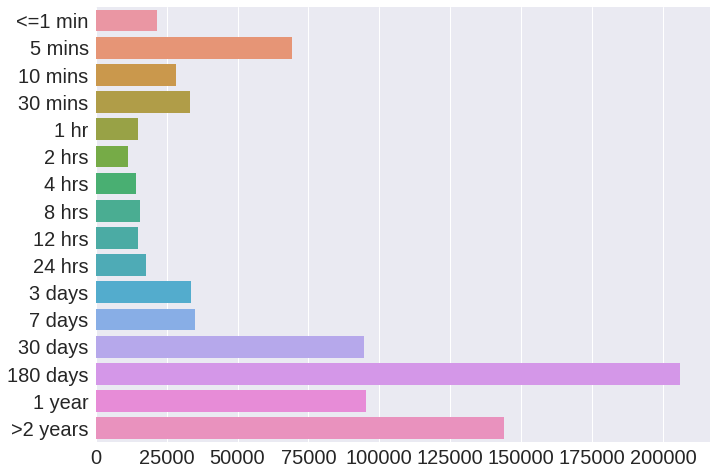

In [196]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=[11,8])
sns.barplot(x=count, y=division[1:], ax=ax, orient="h")
txt = ax.set_yticklabels(bin_labels)
#lt.xticks(rotation='vertical')

In [197]:
bins=[0,(5/60),1,24,(24*7), (24*30), (24*90), (24*180), (24*365), (24*365*2)]
bin_labels = ["<5 mins",
              "5-60 mins",
              "1-24 hrs",
              "1-7 days",
              "7-30 days",
              "30-90 days",
              "90-180 days",
              "180 days-1 year",
              "1-2 years",
              ">2 years"]
count, division = np.histogram(en_df['time_to_revert_hrs'], bins=bins)

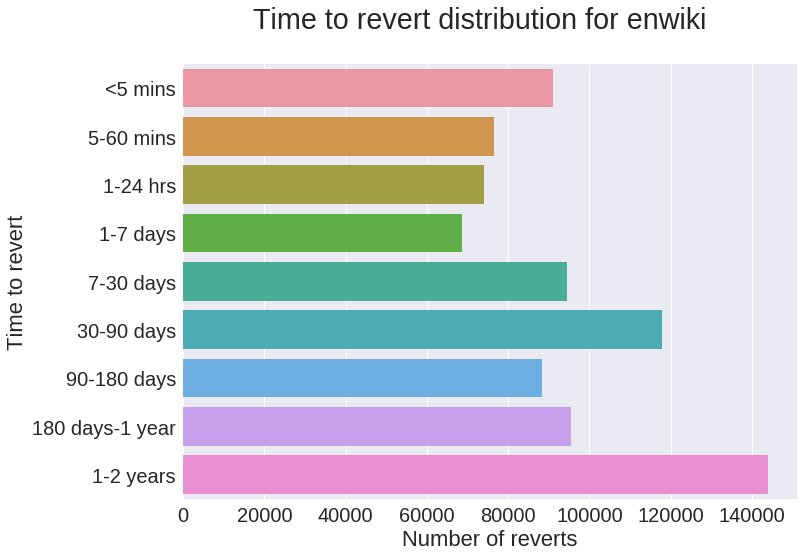

In [198]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=[11,8])
sns.barplot(x=count, y=division[1:], ax=ax, orient="h")
txt = ax.set_yticklabels(bin_labels)
#plt.xticks(rotation='vertical')
ax.set_xlabel("Number of reverts")
ax.set_ylabel("Time to revert")
plt.suptitle("Time to revert distribution for enwiki")